In [154]:
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import cv2

Text(0.5, 1.0, 'Anh goc')

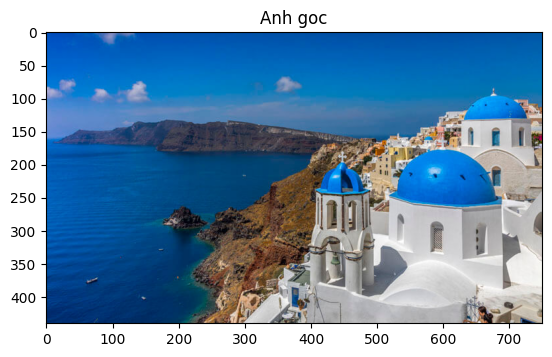

In [155]:
filename = 'beach.jpg'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.title('Anh goc')

Text(0.5, 1.0, 'Su dung thu vien co san trong cv2')

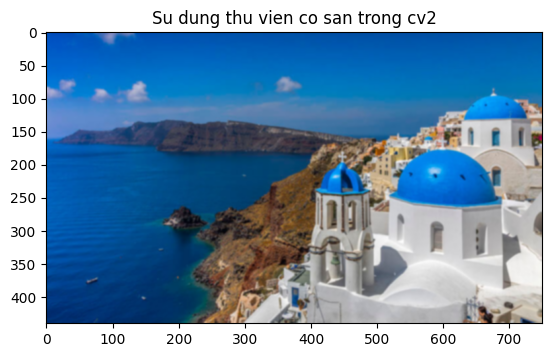

In [167]:
size = 5
gaussian_smoothing = cv2.GaussianBlur(img, (size,size), 0, 0)
plt.imshow(gaussian_smoothing)
plt.title('Su dung thu vien co san trong cv2')

In [168]:
# Em cung doc qua ve Gaussian filter va co tap code lai nhu o duoi
# Tra ve gia tri cua phan phoi chuan tai x
def normalDensity(x, mu=0, sigma=1):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.e ** (-np.power((x - mu) / sigma, 2) / 2)

# Tra ve gaussian kernel
def gaussian_kernel(size, sigma=1):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    kernel_1D[:] = normalDensity(kernel_1D[:])
    kernel_2D = np.outer(kernel_1D, kernel_1D)

    return kernel_2D

print(gaussian_kernel(size=5,sigma=1))

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


Text(0.5, 1.0, 'Su dung ham tu code')

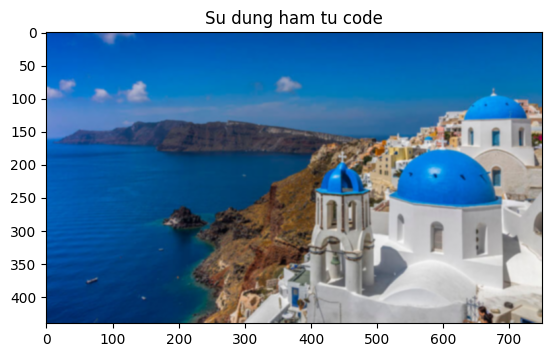

In [169]:
# size = 5
gaussian_smoothing = cv2.filter2D(src=img, ddepth=-1, kernel=gaussian_kernel(size, sigma=0))
plt.imshow(gaussian_smoothing)
plt.title('Su dung ham tu code')

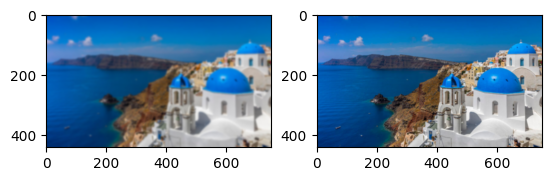

In [174]:
# Tuy nhien khi tang size cua kernel va giu nguyen do lech chuan, ham tu code va built-in trong cv2 co su khac nhau
f, axes = plt.subplots(1,2)
size = 15
gaussian_smoothing = cv2.GaussianBlur(img, (size,size), 0, 0)
axes[0].imshow(gaussian_smoothing)

gaussian_smoothing = cv2.filter2D(src=img, ddepth=-1, kernel=gaussian_kernel(size, sigma=0))
axes[1].imshow(gaussian_smoothing)